# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [21]:
#check for na - data is very clean, no na
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_num             0
dtype: int64

In [22]:
#check for null - data is very clean, no null
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_num             0
dtype: int64

In [23]:
df[df == np.inf].count()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_num             0
dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

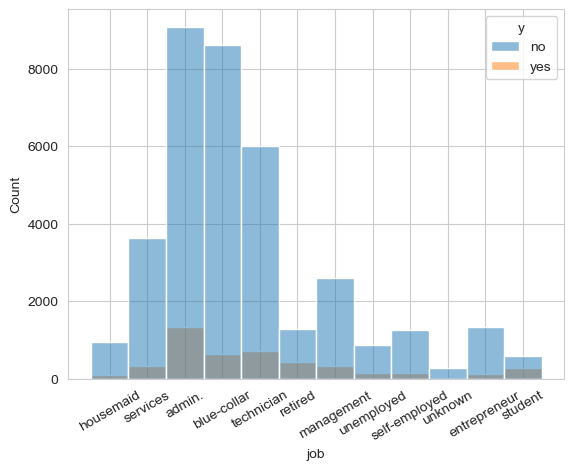

In [30]:
#check the distribution of each variable

sns.histplot (data = df, x = "job", hue = "y")
plt.xticks(rotation=30)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.6y'),
  Text(3, 0, 'basic.9y'),
  Text(4, 0, 'professional.course'),
  Text(5, 0, 'unknown'),
  Text(6, 0, 'university.degree'),
  Text(7, 0, 'illiterate')])

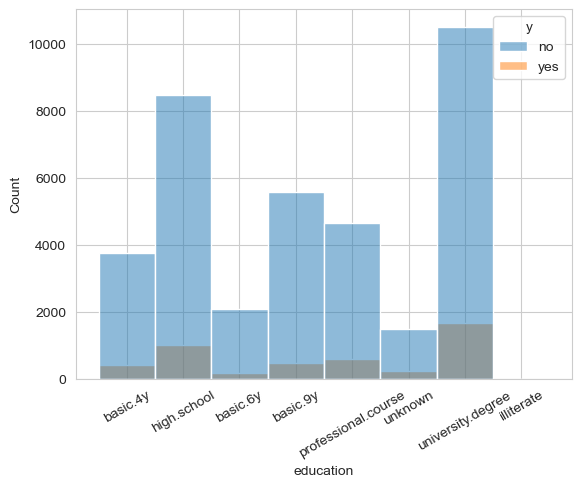

In [32]:
#check the distribution of each variable
sns.histplot (data = df, x = "education", hue = "y")
plt.xticks(rotation=30)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='marital', ylabel='Count'>

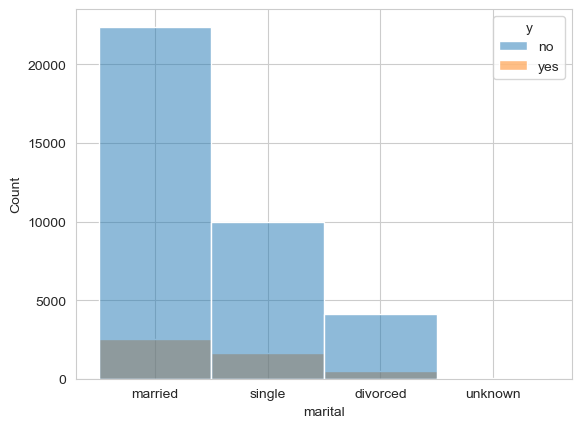

In [33]:
#check the distribution of each variable
sns.histplot (data = df, x = "marital", hue = "y")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='month', ylabel='Count'>

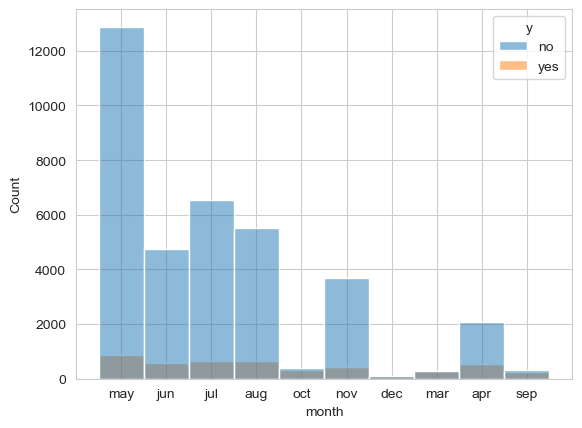

In [34]:
#check the distribution of each variable
sns.histplot (data = df, x = "month", hue = "y")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='day_of_week', ylabel='Count'>

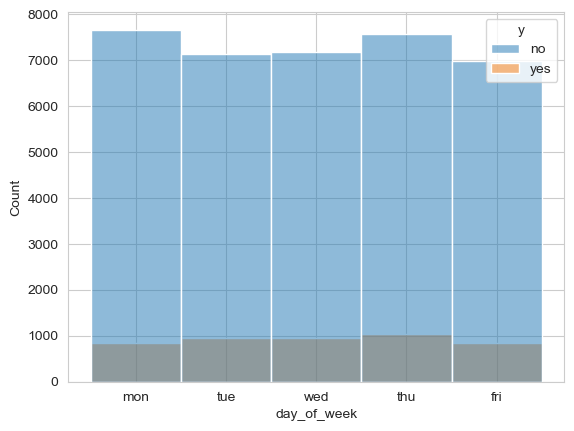

In [35]:
#check the distribution of each variable
sns.histplot (data = df, x = "day_of_week", hue = "y")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='default', ylabel='Count'>

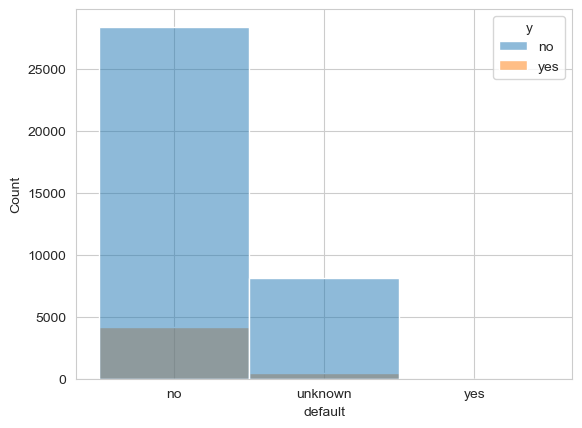

In [36]:
#check the distribution of each variable
sns.histplot (data = df, x = "default", hue = "y")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='housing', ylabel='Count'>

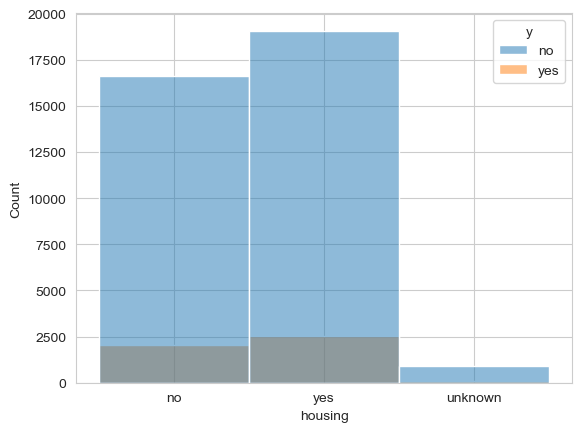

In [37]:
#check the distribution of each variable
sns.histplot (data = df, x = "housing", hue = "y")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='loan', ylabel='Count'>

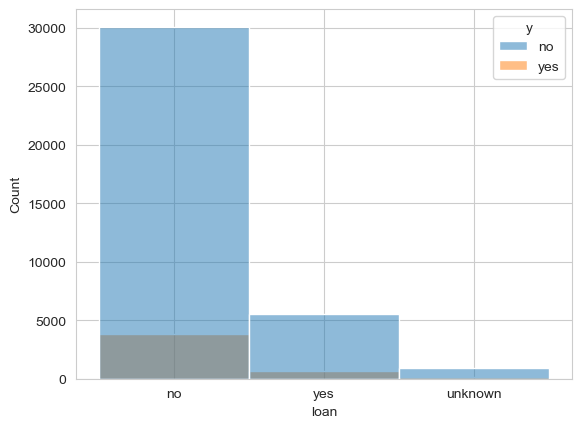

In [38]:
#check the distribution of each variable
sns.histplot (data = df, x = "loan", hue = "y")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]


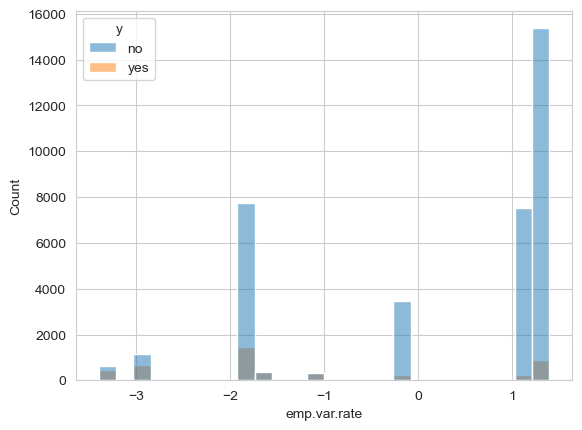

In [39]:
#check the distribution of each variable
sns.histplot (data = df, x = "emp.var.rate", hue = "y")
print (df ["emp.var.rate"].unique())

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]


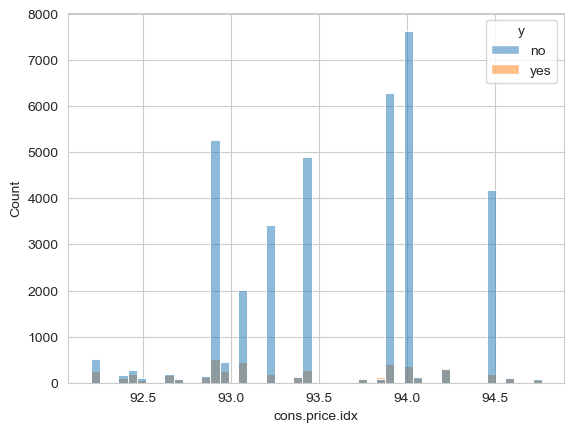

In [40]:
#check the distribution of each variable
sns.histplot (data = df, x = "cons.price.idx", hue = "y")
print (df ["cons.price.idx"].unique())

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


316


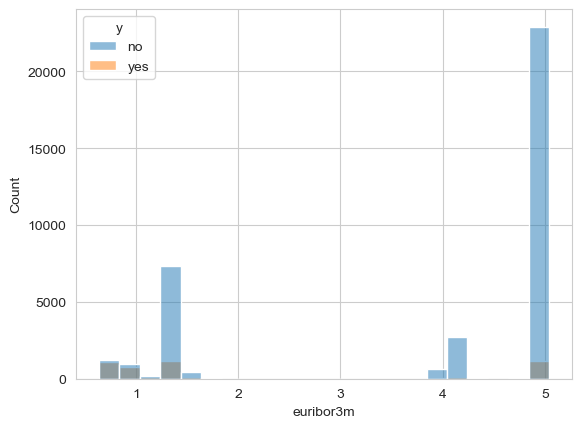

In [41]:
#check the distribution of each variable
sns.histplot (data = df, x = "euribor3m", hue = "y")
print (len(df ["euribor3m"].unique()))

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


1544


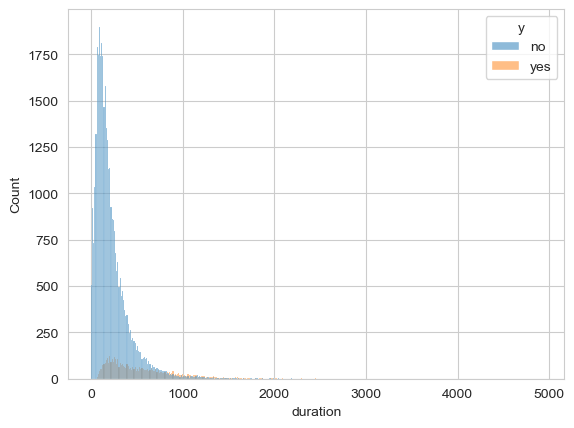

In [42]:
#check the distribution of each variable
sns.histplot (data = df, x = "duration", hue = "y")
print (len(df ["duration"].unique()))

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]


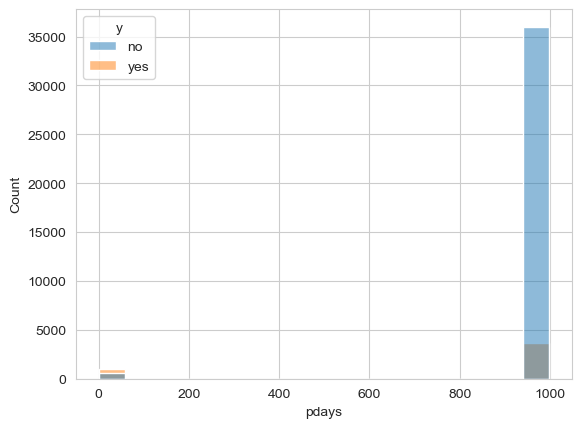

In [43]:
#check the distribution of each variable
sns.histplot (data = df, x = "pdays", hue = "y")
print (df ["pdays"].unique())

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='poutcome', ylabel='Count'>

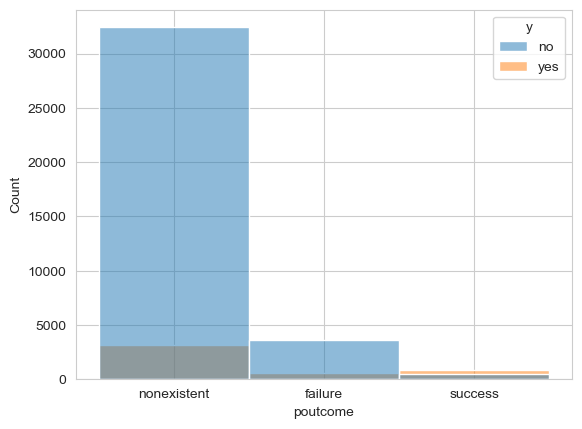

In [93]:
#check the distribution of each variable
sns.histplot (data = df, x = "poutcome", hue = "y")

In [10]:
#lets make a list of the categorical features for onehot
categorical_features = ["education", "job", "marital", "housing", "loan", "contact", "month", "day_of_week"]

df ["y_num"] = df["y"].map({"no": 0, "yes":1})
numerical_features = ["age", "campaign", "pdays", "previous", "duration", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed", "y_num"]

In [11]:
#check the correlation matrix
df[numerical_features].corr()

,age,campaign,pdays,previous,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
age,1.000000,0.004594,-0.034369,0.024365,-0.000866,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
campaign,0.004594,1.000000,0.052584,-0.079141,-0.071699,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,0.052584,1.000000,-0.587514,-0.047577,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,-0.079141,-0.587514,1.000000,0.020640,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
duration,-0.000866,-0.071699,-0.047577,0.020640,1.000000,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
emp.var.rate,-0.000371,0.150754,0.271004,-0.420489,-0.027968,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.127836,0.078889,-0.203130,0.005312,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.013733,-0.091342,-0.050936,-0.008173,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,0.135133,0.296899,-0.454494,-0.032897,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,0.144095,0.372605,-0.501333,-0.044703,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


In [15]:
X = df.drop (columns = ["y", "y_num", "default", "duration", "pdays", "poutcome"])
y = df["y_num"]

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn import svm
import time

In [46]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.33, random_state=42 )

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [75]:
y_test.value_counts(normalize = True)

y_num
0    0.886927
1    0.113073
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x1b201e97b10>,
 [Text(-1.0318259710710267, 0.3812284950306482, 'Not purchased'),
  Text(1.031825997840915, -0.3812284225757576, 'Purchased')],
 [Text(-0.5628141660387418, 0.20794281547126264, '88.73%'),
  Text(0.562814180640499, -0.20794277595041322, '11.27%')])

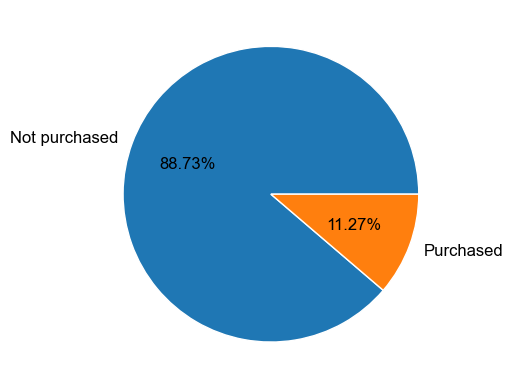

In [74]:
plt.pie(y.value_counts(), 
       labels = ["Not purchased", "Purchased"],
       autopct ='%1.2f%%',
       textprops = dict(color ="black", size=12)) 

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [101]:
#create a pipeline with logistic regression
start = time.time()

logpipe = Pipeline ([
    ("preprocess", make_column_transformer( 
        (OneHotEncoder(), categorical_features), remainder=StandardScaler())
    ),
    ("selector", SelectFromModel(estimator=LogisticRegression(penalty='l1', random_state=42, solver='liblinear'))),
    ("model", LogisticRegression(max_iter = 1000))
]).fit (X_train, y_train)

stop = time.time()

logtime = round(stop - start, 2)
print(f"Logistic Training time: {logtime}s")

Logistic Training time: 8.28s


### Problem 9: Score the Model

What is the accuracy of your model?

In [81]:
logtrainscore = logpipe.score (X_train, y_train)
logtestscore = logpipe.score (X_test, y_test)

print (f"Logistic Regression Test Accuracy: {logtestscore}")
print (f"Logistic Regression Train Accuracy: {logtestscore}")

Logistic Regression Test Accuracy: 0.8920768042374752
Logistic Regression Train Accuracy: 0.8920768042374752


In [86]:
logpreds = logpipe.predict (X_test)

print('Precision Score: ', precision_score(y_test, logpreds))
print('Recall Score: ', recall_score(y_test, logpreds))

Precision Score:  0.5760869565217391
Recall Score:  0.1724137931034483


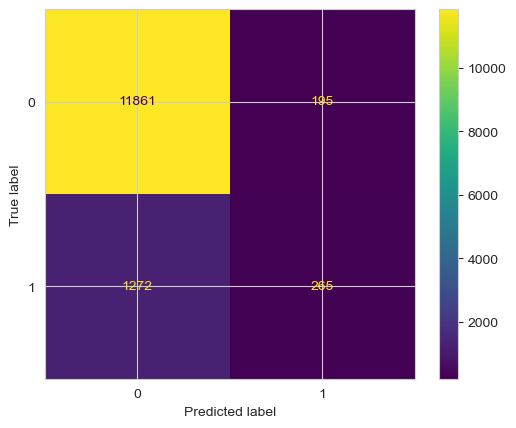

In [88]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, logpreds)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot()

In [ ]:
print('Precision Score: ', precision_score(y_train, y_train_pred))

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [99]:
#knn 
start = time.time()
knnpipe = Pipeline ([
    ("preprocess", make_column_transformer( 
        (OneHotEncoder(), categorical_features), remainder=StandardScaler())
    ),
    ("knn", KNeighborsClassifier ())
]).fit (X_train, y_train)

stop = time.time()
knntime = round(stop - start, 2)
print(f"KNN Training time: {knntime}s")

knntrainscore = knnpipe.score (X_train, y_train)
knntestscore = knnpipe.score (X_test, y_test)

print(f"KNN Train Accuracy: {knntrainscore}")
print(f"KNN Test Accuracy: {knntestscore}")


KNN Training time: 0.12s
KNN Train Accuracy: 0.9101286464939301
KNN Test Accuracy: 0.8842051055690429


In [98]:
#decision trees
start = time.time()

dtpipe = Pipeline ([
    ("preprocess", make_column_transformer( 
        (OneHotEncoder(), categorical_features), remainder=StandardScaler())
    ),
    ("dt", DecisionTreeClassifier ())
]).fit (X_train, y_train)

stop = time.time()
dttime = round(stop - start, 2)
print(f"Training time: {dttime}s")

dttrainscore = dtpipe.score (X_train, y_train)
dttestscore = dtpipe.score (X_test, y_test)

print(f"Decision Tree Train Accuracy: {dttrainscore}")
print(f"Decision Tree Test Accuracy: {dttestscore}")


Training time: 2.39s
Decision Tree Train Accuracy: 0.9952890016307302
Decision Tree Test Accuracy: 0.8417567865813286


In [100]:
#support vector machine
start = time.time()

svmpipe = Pipeline ([
    ("preprocess", make_column_transformer( 
        (OneHotEncoder(), categorical_features), remainder=StandardScaler())
    ),
    ("svm", svm.SVC())
]).fit (X_train, y_train)

stop = time.time()
svmtime = round(stop - start, 2)
print(f"Training time: {svmtime}s")

svmtrainscore = svmpipe.score (X_train, y_train)
svmtestscore = svmpipe.score (X_test, y_test)

print(f"SVM Train Accuracy: {svmtrainscore}")
print(f"SVM Test Accuracy: {svmtestscore}")


Training time: 107.69s
SVM Train Accuracy: 0.9038593948179018
SVM Test Accuracy: 0.8959758699330538


In [102]:
#final data frame with the modesl and model perofrmance
results = pd.DataFrame (columns = ["Model", "Train Time", "Train Score", "Test Score"], 
                        data = [
                            ["Logistic", logtime, round(logtrainscore, 3), round(logtestscore, 3)],
                            ["KNN", knntime, round(knntrainscore, 3), round(knntestscore, 3)],
                            ["Decision Tree", dttime, round(dttrainscore, 3), round(dttestscore, 3)],
                            ["SVM", svmtime, round(svmtrainscore, 3), round(svmtestscore, 3)]
                        ]
                       )
results.set_index('Model', inplace=True)
print (results)

               Train Time  Train Score  Test Score
Model                                             
Logistic             8.28        0.893       0.892
KNN                  0.12        0.910       0.884
Decision Tree        2.39        0.995       0.842
SVM                107.69        0.904       0.896


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [103]:
from sklearn.model_selection import GridSearchCV

#we dont have a gender feature in the dataset

In [104]:
#knn hyper param tuning
knnparams = [{'knn__n_neighbors': list (range (3, 10, 1))}]

knngs = GridSearchCV(knnpipe, param_grid=knnparams,
                     scoring='accuracy')
knngs.fit (X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['education',
                                                                          'job',
                                                                          'marital',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__n_neighbors': [3, 4, 5, 6, 7, 8, 9]}],
             scoring='accuracy')

In [105]:
print (knngs.best_params_)
print (knngs.best_score_)

{'knn__n_neighbors': 6}
0.8892552998731654


In [189]:
knngstrainscore = knngs.best_score_
knngstestscore = knngs.best_estimator_.score (X_test, y_test)

In [176]:
#decision tree hyper param tuning
dtparams = [{'dt__max_depth': list (range (3, 10, 1)),
            'dt__min_samples_leaf': [1, 3, 5, 7]}]

dtgs = GridSearchCV(dtpipe, param_grid=dtparams,
                     scoring='accuracy')
dtgs.fit (X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['education',
                                                                          'job',
                                                                          'marital',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week'])])),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid=[{'dt__max_depth': [3, 4, 5, 6, 7, 8, 9],
                          'dt__min_samples_leaf': [1, 3, 5, 7]}],
             scoring='accuracy')

In [177]:
print (dtgs.best_params_)
print (dtgs.best_score_)

{'dt__max_depth': 5, 'dt__min_samples_leaf': 3}
0.8938575828954521


In [181]:
dtgstrainscore = dtgs.best_score_
dtgstestscore = dtgs.best_estimator_.score (X_test, y_test)

print (dtgstrainscore)
print (dtgstestscore)

0.8938575828954521
0.8945045243875525


In [184]:
#svm hyper param tuning 
####
# COMMENTED OUT BECAUSE IT RUNS REALLY LONG
####
#svmparams = {'svm__C': [0.1, 1, 10, 100, 1000],  
#              'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#              'svm__kernel': ['rbf']}  

svmparams = {'svm__C': [1],  
              'svm__gamma': [0.1], 
              'svm__kernel': ['rbf']}  


svmgs = GridSearchCV(svmpipe, param_grid=svmparams, scoring='accuracy')
svmgs.fit (X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['education',
                                                                          'job',
                                                                          'marital',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week'])])),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10, 100, 1000],
                         'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svm__kernel': ['rbf']},
             scoring='accuracy')

In [185]:
print (svmgs.best_params_)
print (svmgs.best_score_)

{'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
0.8958869360391375


In [186]:
svmgstrainscore = svmgs.best_score_
svmgstestscore = svmgs.best_estimator_.score (X_test, y_test)

print (svmgstrainscore)
print (svmgstestscore)

0.8958869360391375
0.8956816008239535


In [190]:
#results after hyper param tuning
resultstuned = pd.DataFrame (columns = ["Model", "Train Time", "Train Score", "Test Score"], 
                        data = [
                            ["KNN", knntime, round(knngstrainscore, 3), round(knngstestscore],
                            ["Decision Tree", dttime, round(dtgstrainscore, 3), round(dtgstestscore, 3)],
                            ["SVM", svmtime, round(svmgstrainscore, 3), round(svmgstestscore, 3)]
                        ]
                       )
resultstuned.set_index('Model', inplace=True)
print (resultstuned)

               Train Time  Train Score  Test Score
Model                                             
KNN              0.114635     0.889255    0.888398
Decision Tree    2.392734     0.893858    0.894505
SVM            101.087581     0.895887    0.895682


##### Questions